Ibraheem Saleh

CSE 482 - Big Data Analysis

Class Project

In [138]:
import pandas as dataTable
%matplotlib inline

# Load data using pandas read_csv (185404 rows of data)
data = dataTable.read_csv("EntireDataSetDetroit.csv", header = 0)

# display the first 10 rows
data.head(10)

,Incident Date,Incident Time,Offense Category,Day of Week,Neighborhood
0,3/12/19,530,ASSAULT,Weekday,Palmer Woods
1,3/12/19,523,ASSAULT,Weekday,Garden Homes
2,3/12/19,503,ASSAULT,Weekday,Nortown
3,3/12/19,411,ASSAULT,Weekday,Warrendale
4,3/12/19,405,DAMAGE TO PROPERTY,Weekday,Franklin Park
5,3/12/19,405,AGGRAVATED ASSAULT,Weekday,Franklin Park
6,3/12/19,330,LARCENY,Weekday,Midtown
7,3/12/19,230,ASSAULT,Weekday,Grand River-St Marys
8,3/12/19,207,BURGLARY,Weekday,Bagley
9,3/12/19,157,ASSAULT,Weekday,Farwell


In [139]:
dayOfWeek = data['Day of Week']
plotVal = data.drop('Day of Week', axis = 1)
plotVal = plotVal.drop('Incident Date', axis = 1)
#plotVal = plotVal.drop('Incident Time', axis = 1)
plotVal = plotVal.drop('Offense Category', axis = 1)


In [140]:
from sklearn.model_selection import train_test_split
plotVal = plotVal.drop('Neighborhood', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(plotVal, dayOfWeek, test_size = 0.3 , random_state = 1)


In [141]:
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

maxdepths = [1,5,10,20,30,40,50]
validationAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
index = 0

np.random.seed(1)
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    scores = cross_val_score(clf, X_train, y_train, cv = 10)
    validationAcc[index] = np.mean(scores)
    clf.fit( X_train, y_train )
    Y_predTest = clf.predict(X_test)
    testAcc[index] = accuracy_score(y_test, Y_predTest)
    index += 1

Best hyperparameter, maxdepth = 1
Test Accuracy = 0.7227665809676201


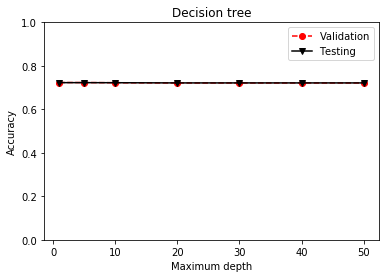

In [142]:
plt.plot(maxdepths, validationAcc, 'ro--', maxdepths, testAcc, 'kv-')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.title('Decision tree')
plt.legend(['Validation','Testing'])
plt.ylim([0.0,1.0])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, maxdepth =', maxdepths[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

In [143]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numEstimators = 500
np.random.seed(1)
clf = ensemble.RandomForestClassifier( n_estimators=numEstimators )
clf.fit( X_train, y_train )
Y_pred = clf.predict( X_test )
print('Test Accuracy =', accuracy_score( y_test, Y_pred ))

Test Accuracy = 0.7212024235450639


(array([1.26695e+05, 0.00000e+00, 5.47040e+04, 0.00000e+00, 0.00000e+00,
        3.80400e+03, 0.00000e+00, 1.37000e+02, 0.00000e+00, 6.30000e+01]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

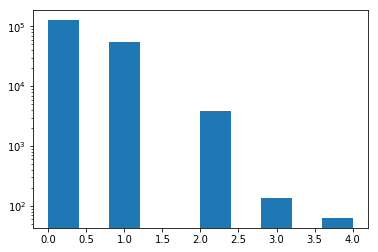

In [144]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

%matplotlib inline

knn = 100
nbrs = NearestNeighbors(n_neighbors = knn + 1).fit(plotVal)
distances, indices = nbrs.kneighbors(plotVal.values)
ax = plt.axes(yscale = 'log')
ax.hist(distances[:,knn])

In [145]:
outlier = np.flipud(np.argsort(distances[:,knn]))
sort_dist = np.flipud(np.sort(distances[:,knn]))

In [146]:
p = dataTable.DataFrame(np.column_stack((outlier,sort_dist)),columns=['index','score'])
p.head()

,index,score
0,155341.0,4.0
1,130134.0,4.0
2,176379.0,4.0
3,26009.0,4.0
4,114824.0,4.0


Area under ROC = 0.5075


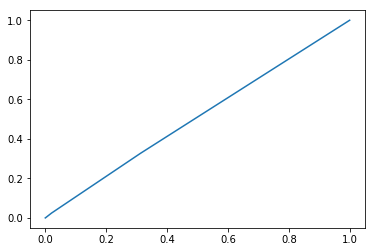

In [147]:
from sklearn.metrics import roc_curve, auc
%matplotlib inline

checkDay = (dayOfWeek == 'Weekend')

fpr, tpr, thresholds = roc_curve(checkDay, distances[:,knn])
roc_auc = auc( fpr,tpr )
plt.plot(fpr, tpr)
print('Area under ROC = %.4f' % (roc_auc))

In [148]:
from surprise import Dataset
from surprise import Reader

import pandas as dataTable

data = dataTable.read_csv("EntireDataSetDetroit.csv")

In [149]:
reader = Reader(line_format='user item rating', sep=',', rating_scale=(0,10))
data = Dataset.load_from_df(data[['Neighborhood', 'Day of Week', 'Incident Time']], reader=reader)
data.raw_ratings[:5]

[('Palmer Woods', 'Weekday', 531.0, None),
 ('Garden Homes', 'Weekday', 524.0, None),
 ('Nortown', 'Weekday', 504.0, None),
 ('Warrendale', 'Weekday', 412.0, None),
 ('Franklin Park', 'Weekday', 406.0, None)]

In [150]:
from surprise import NMF
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size = 0.5, random_state = 1 )

algo = NMF( n_factors = 20, n_epochs = 200, random_state = 1 )
algo.fit( trainset )

In [151]:
#Inaccurate due to larger time period
#Data is not split up, based on 24 hour time period
from surprise import accuracy

pred = algo.test( testset )
accuracy.rmse( pred ), accuracy.mae( pred )

RMSE: 1446.6425
MAE:  1260.9573


(1446.642475298819, 1260.9572625594967)

In [152]:
for i in range(10):
    print(pred[i])

user: Northeast Central District item: Weekday    r_ui = 343.00   est = 10.00   {'was_impossible': False}
user: West End   item: Weekday    r_ui = 1145.00   est = 10.00   {'was_impossible': False}
user: Oak Grove  item: Weekend    r_ui = 240.00   est = 10.00   {'was_impossible': False}
user: Airport Sub item: Weekday    r_ui = 1700.00   est = 10.00   {'was_impossible': False}
user: Plymouth-Hubbell item: Weekday    r_ui = 334.00   est = 10.00   {'was_impossible': False}
user: Poletown East item: Weekday    r_ui = 1314.00   est = 10.00   {'was_impossible': False}
user: Morningside item: Weekday    r_ui = 1130.00   est = 10.00   {'was_impossible': False}
user: Minock Park item: Weekend    r_ui = 1839.00   est = 10.00   {'was_impossible': False}
user: Fox Creek  item: Weekend    r_ui = 130.00   est = 10.00   {'was_impossible': False}
user: Brightmoor item: Weekend    r_ui = 928.00   est = 10.00   {'was_impossible': False}


In [153]:
from surprise import Dataset
from surprise import Reader

import pandas as dataTable

data = dataTable.read_csv("EntireDataSetDetroit.csv")

In [154]:
reader = Reader(line_format='user item rating', sep=',', rating_scale=(0,10))
data = Dataset.load_from_df(data[['Neighborhood', 'Incident Date', 'Incident Time']], reader=reader)
data.raw_ratings[:5]

[('Palmer Woods', '3/12/19', 531.0, None),
 ('Garden Homes', '3/12/19', 524.0, None),
 ('Nortown', '3/12/19', 504.0, None),
 ('Warrendale', '3/12/19', 412.0, None),
 ('Franklin Park', '3/12/19', 406.0, None)]

In [155]:
from surprise import NMF
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size = 0.5, random_state = 1 )

algo = NMF( n_factors = 20, n_epochs = 200, random_state = 1 )
algo.fit( trainset )

In [156]:
#Calculations are similar but not exactly like predicted time's of occurrence before
from surprise import accuracy

pred = algo.test( testset )
accuracy.rmse( pred ), accuracy.mae( pred )

RMSE: 1446.6641
MAE:  1260.9792


(1446.664136706908, 1260.9792489334445)

In [161]:
for i in range(20):
    print(pred[i])

user: Northeast Central District item: 2/1/19     r_ui = 343.00   est = 10.00   {'was_impossible': False}
user: West End   item: 2/14/18    r_ui = 1145.00   est = 10.00   {'was_impossible': False}
user: Oak Grove  item: 12/11/16   r_ui = 240.00   est = 10.00   {'was_impossible': False}
user: Airport Sub item: 2/15/18    r_ui = 1700.00   est = 10.00   {'was_impossible': False}
user: Plymouth-Hubbell item: 2/26/18    r_ui = 334.00   est = 10.00   {'was_impossible': False}
user: Poletown East item: 10/29/18   r_ui = 1314.00   est = 10.00   {'was_impossible': False}
user: Morningside item: 5/22/18    r_ui = 1130.00   est = 10.00   {'was_impossible': False}
user: Minock Park item: 8/26/17    r_ui = 1839.00   est = 10.00   {'was_impossible': False}
user: Fox Creek  item: 1/19/19    r_ui = 130.00   est = 10.00   {'was_impossible': False}
user: Brightmoor item: 1/13/18    r_ui = 928.00   est = 10.00   {'was_impossible': False}
user: Wade       item: 10/15/18   r_ui = 1800.00   est = 10.00   {'